In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height-knn.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
X = df.drop('Gender',axis=1)

In [6]:
X.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [7]:
y = df['Gender']

In [8]:
y.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [9]:
y = y.apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))

In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .30,random_state = 42)

In [13]:
X_train.shape

(5988, 2)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,plot_roc_curve

In [17]:
predict = neigh.predict(X_test)

cm = confusion_matrix(y_test,predict)
cm

array([[ 946,  120],
       [  92, 1409]], dtype=int64)

In [18]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1066
           1       0.92      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.91      0.91      2567
weighted avg       0.92      0.92      0.92      2567



In [19]:
accuracy_score = accuracy_score(y_test,predict)

In [20]:
print(accuracy_score)

0.917413322945072


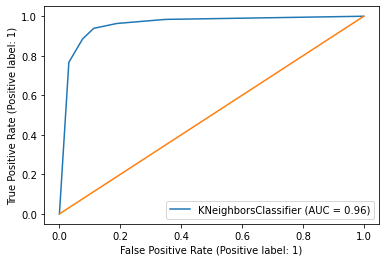

In [21]:
plot_roc_curve(neigh,X_test,y_test)
plt.plot([0,1],[0,1])

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
n_neighbors = [int(i) for i in np.linspace(1,50,30)]
grids = {
 'n_neighbors' : n_neighbors   
}

In [24]:
neigh_opt = KNeighborsClassifier()
rmcv = RandomizedSearchCV(neigh_opt,grids,n_iter=200,cv=3)

In [25]:
rmcv.fit(X_train,y_train)

C:\Users\sumon\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 30 is smaller than n_iter=200. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=200,
                   param_distributions={'n_neighbors': [1, 2, 4, 6, 7, 9, 11,
                                                        12, 14, 16, 17, 19, 21,
                                                        22, 24, 26, 28, 29, 31,
                                                        33, 34, 36, 38, 39, 41,
                                                        43, 44, 46, 48, 50]})

In [26]:
rmcv.best_params_

{'n_neighbors': 22}

In [27]:
neigh_opt = rmcv.best_estimator_

In [28]:
neigh_opt.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

In [29]:
predict_opt = neigh.predict(X_test)

cm_opt = confusion_matrix(y_test,predict_opt)
cm_opt

array([[ 946,  120],
       [  92, 1409]], dtype=int64)

In [30]:
print(classification_report(y_test,predict_opt))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1066
           1       0.92      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.91      0.91      2567
weighted avg       0.92      0.92      0.92      2567



In [35]:
accuracy_score = neigh_opt.score(X_test,y_test)
accuracy_score

0.9201402415270744

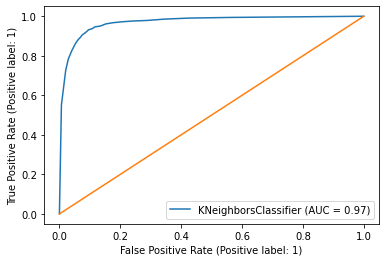

In [36]:
plot_roc_curve(neigh_opt,X_test,y_test)
plt.plot([0,1],[0,1])